### Raj Choudhary
### 16BCE1384
### Repository-link: https://github.com/raj1603chdry/CSE4020-MachineLearningLabs
<br/><br/>

<p style="color: purple; font-size: 2em">Importing the libraries</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<p style="color: purple; font-size: 2em">Importing the dataset</p>

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
raw_data = pd.read_excel('../datasets/ameo_dataset/raw_dataset/train.xlsx')
raw_data.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


##### Dropping unnecessary columns and indexes 

In [4]:
raw_data.drop(['ID'], axis = 1, inplace = True)
raw_data.reset_index(drop = True, inplace = True)

In [5]:
raw_data.describe()

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


### Preprocessing the dataset 

##### Organising column labels 

In [6]:
targets = ['Salary',
          'DOJ',
          'DOL',
          'Designation',
          'JobCity']

In [7]:
features = ['Gender',
            'DOB',
            '10percentage',
            '10board',
            '12graduation',
            '12percentage',
            '12board',
            'CollegeID',
            'CollegeTier',
            'Degree',
            'Specialization',
            'CollegeGPA',
            'CollegeCityID',
            'CollegeCityTier',
            'CollegeState',
            'GraduationYear',
            'English',
            'Logical',
            'Quant',
            'Domain',
            'ComputerProgramming',
            'ElectronicsAndSemicon',
            'ComputerScience',
            'MechanicalEngg',
            'ElectricalEngg',
            'TelecomEngg',
            'CivilEngg',
            'conscientiousness',
            'agreeableness',
            'extraversion',
            'nueroticism',
            'openess_to_experience']

In [8]:
cat_features =['Gender',
               'DOB',
               '10board',
               '12graduation',
               '12board',
               'CollegeID',
               'CollegeTier',
               'Degree',
               'Specialization',
               'CollegeCityID',
               'CollegeCityTier',
               'CollegeState',
               'GraduationYear']

In [9]:
domain_scores = ['Domain',
                 'ComputerProgramming',
                 'ElectronicsAndSemicon',
                 'ComputerScience',
                 'MechanicalEngg',
                 'ElectricalEngg',
                 'TelecomEngg',
                 'CivilEngg']

In [10]:
personality_scores = ['conscientiousness',
                      'agreeableness',
                      'extraversion',
                      'nueroticism',
                      'openess_to_experience']

In [11]:
academic_scores = ['10percentage',
                   '12percentage',
                   'collegeGPA']

In [12]:
std_test_scores = ['English',
                   'Logical',
                   'Quant']

In [13]:
print("Number of features: {}\nNumber of organised features: {}"
      .format(len(features), 
             len(cat_features) + 
             len(domain_scores) +
             len(personality_scores) + 
             len(academic_scores) +
             len(std_test_scores)))

Number of features: 32
Number of organised features: 32


##### Dropping unnecessary columns

In [14]:
drop_features = ['DOB',
                '10board',
                '12graduation',
                '12board',
                'CollegeID',
                'CollegeCityID',
                'CollegeCityTier']

drop_targets = ['DOJ',
                'DOL',
                'Designation',
                'JobCity']

In [15]:
data = raw_data.drop(drop_features + drop_targets, axis = 1)

In [16]:
cat_features = list(set(cat_features) - set(drop_features))

In [17]:
cat_features

['Specialization',
 'CollegeState',
 'GraduationYear',
 'Gender',
 'Degree',
 'CollegeTier']

In [18]:
data.columns

Index(['Salary', 'Gender', '10percentage', '12percentage', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

##### Replacing '-1' and 'NaN' with '0' 

In [19]:
data.isin([-1, 'NaN']).sum()

Salary                      0
Gender                      0
10percentage                0
12percentage                0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
dtype: int64

In [20]:
for i in domain_scores:
    data[i].replace(to_replace = -1, value = 0, inplace = True)

In [21]:
data.isin([-1, 'NaN']).sum()

Salary                   0
Gender                   0
10percentage             0
12percentage             0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

In [22]:
data_good = data.copy()

##### Scaling GPA to 10 point scale 

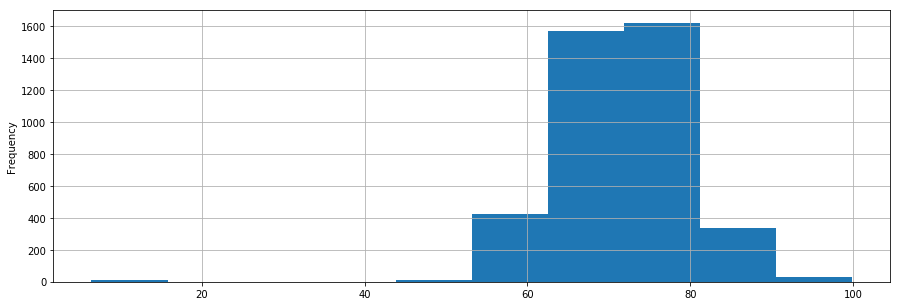

In [23]:
data['collegeGPA'].plot(kind = 'hist', figsize = (15, 5), grid = True)

##### From the graph, it is evident that data for the attribute 'collegeGPA' is present in scales of both 10 and 100. Converting all the data in scales of 100, we get the following graph: 

In [24]:
data.loc[data['collegeGPA'] <= 10, 'collegeGPA'] *= 10

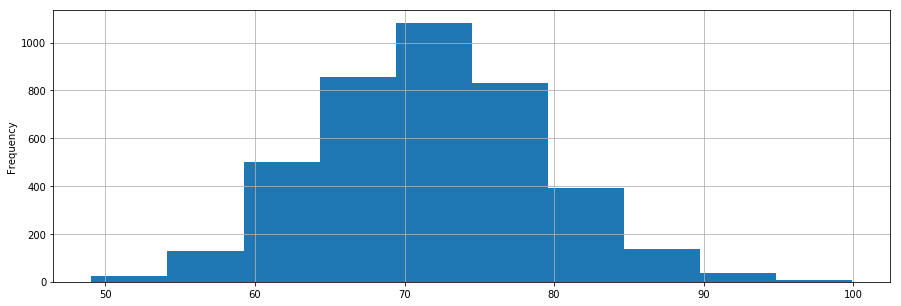

In [25]:
data['collegeGPA'].plot(kind = 'hist', figsize = (15, 5), grid = True)

### Representing different specialization into core disciplines so that the number of different data is reduced

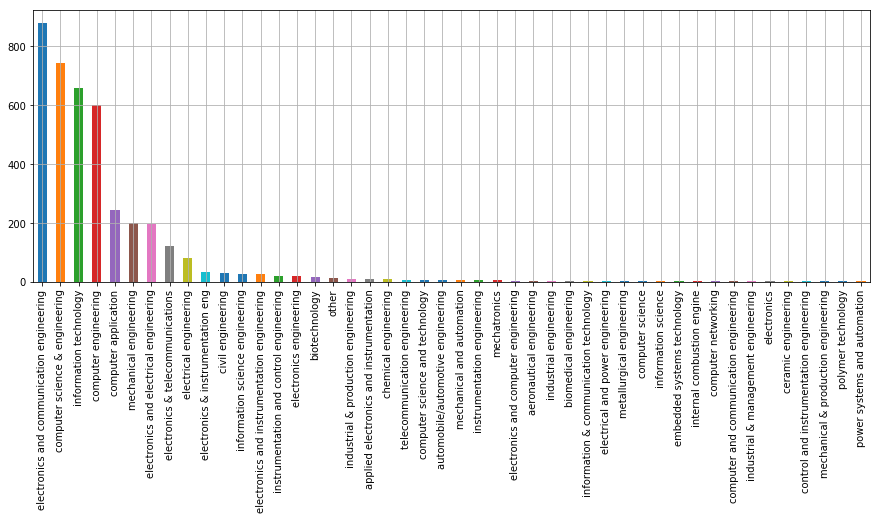

In [26]:
specialization_freq = data['Specialization'].value_counts()
specialization_freq.plot(kind = 'bar', figsize = (15, 5), grid = True)

In [27]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

In [28]:
data['Specialization'] = data['Specialization'].map(specialization_map)

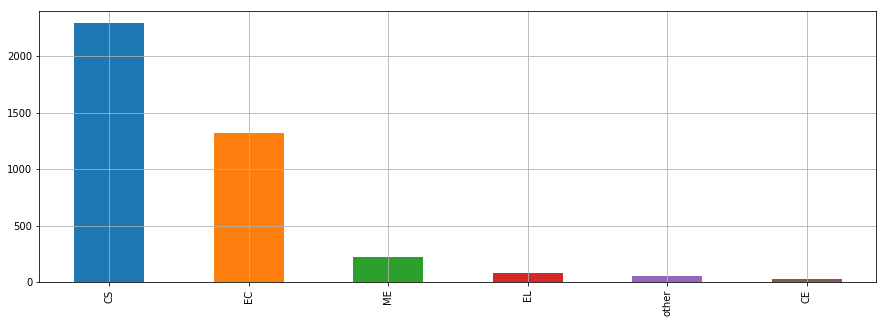

In [29]:
data['Specialization'].value_counts().plot(kind = 'bar', figsize = (15, 5), grid = True)

### Data Visualisation 

##### Gender Ratio

In [30]:
num_males = data['Gender'].where(data['Gender'] == 'm').count()
num_females = data['Gender'].where(data['Gender'] == 'f').count()
print("Number of males: {}".format(num_males))
print("Number of females: {}".format(num_females))
print("Male to Female Gender Ratio: {:.2f}".format(num_males / num_females))

Number of males: 3041
Number of females: 957
Male to Female Gender Ratio: 3.18


#####  Distribution of 10th percentage

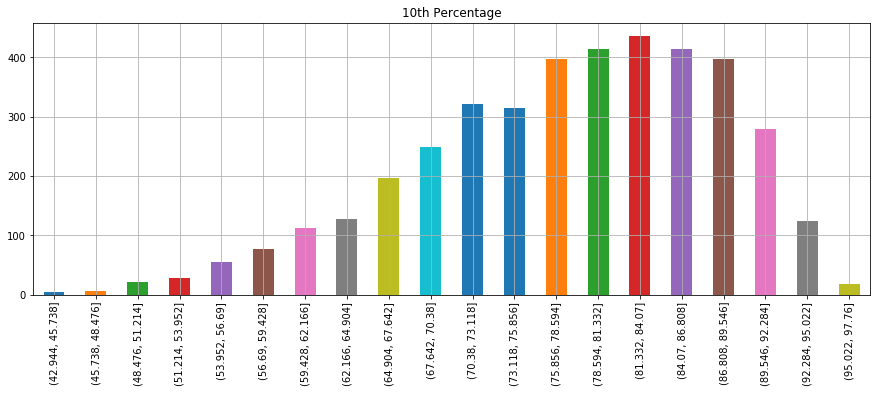

In [31]:
data['10percentage'].value_counts(bins = 20, sort = False).plot(kind = 'bar', title = '10th Percentage', figsize = (15, 5), grid = True)

##### Distribution of 12th percentage 

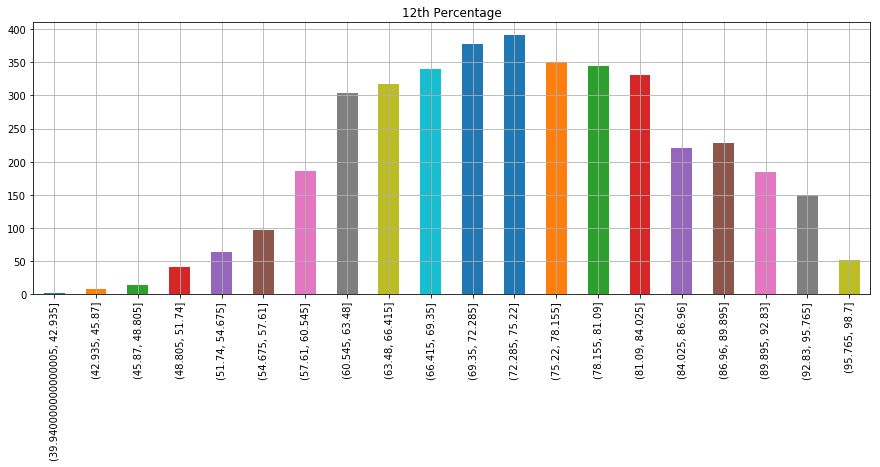

In [32]:
data['12percentage'].value_counts(bins = 20, sort = False).plot(kind = 'bar', title = '12th Percentage', figsize = (15, 5), grid = True)

##### Distribution of College grades 

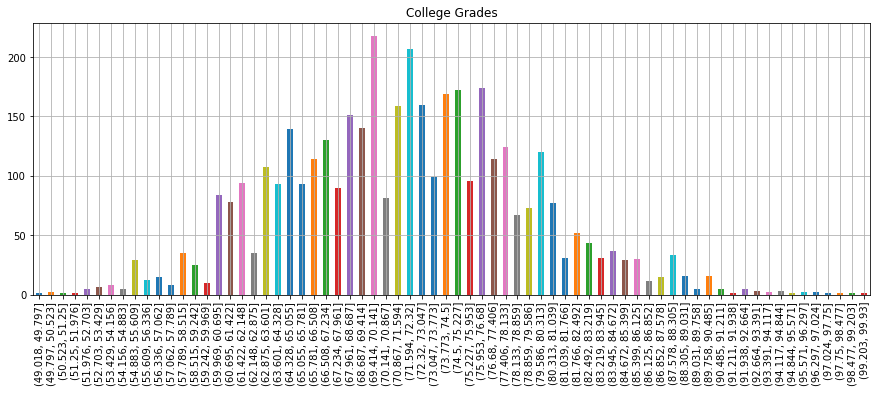

In [33]:
data['collegeGPA'].value_counts(bins = 70, sort = False).plot(kind = 'bar', title = 'College Grades', figsize = (15, 5), grid = True)

##### Distribution of Salary 

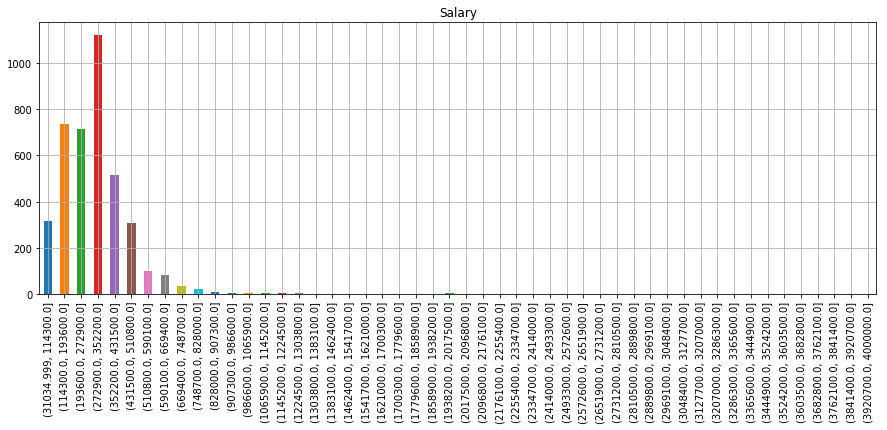

In [34]:
data['Salary'].value_counts(bins = 50, sort = False).plot(kind = 'bar', title = 'Salary', figsize = (15, 5), grid = True)

##### Correlation of personality scores 

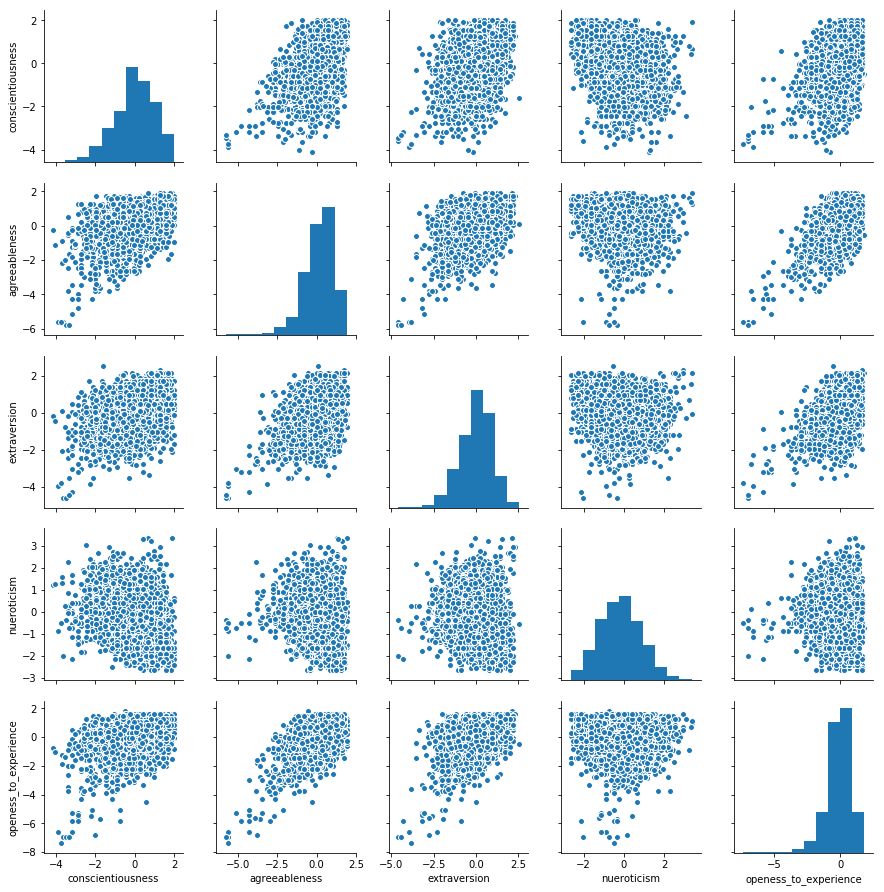

In [35]:
sns.pairplot(data, vars = personality_scores)

##### Correlation of Academic scores

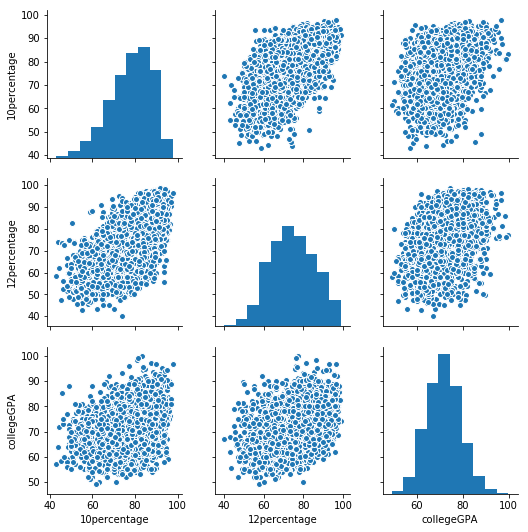

In [36]:
sns.pairplot(data, vars = academic_scores)

##### Correlation of Standard Test Scores 

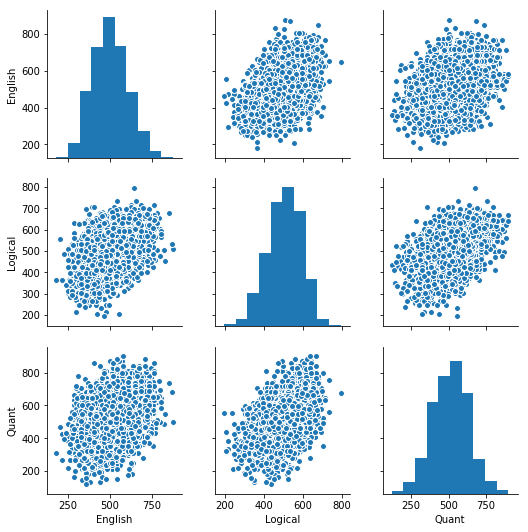

In [37]:
sns.pairplot(data, vars = std_test_scores)

##### Distribution of College Tier 

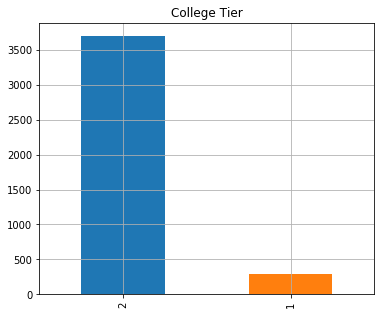

In [38]:
data['CollegeTier'].value_counts().plot(kind = 'bar', title = 'College Tier', figsize = (6, 5), grid = True)

##### Distribution of Awarded Degree 

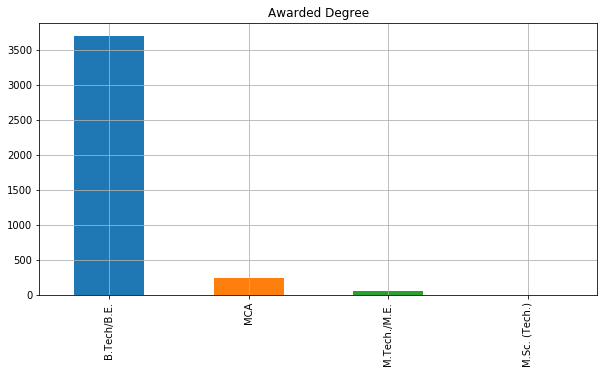

In [39]:
data['Degree'].value_counts().plot(kind = 'bar', title = 'Awarded Degree', figsize = (10, 5), grid = True)

##### Distribution of Gender

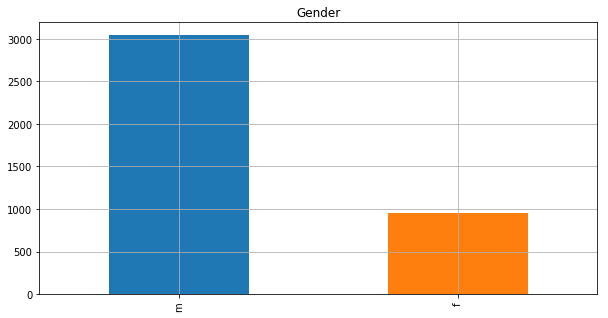

In [40]:
data['Gender'].value_counts().plot(kind = 'bar', title = 'Gender', figsize = (10, 5), grid = True)

##### Distribution of Graduation year 

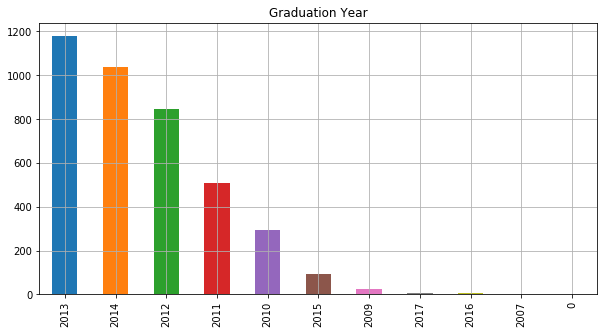

In [41]:
data['GraduationYear'].value_counts().plot(kind = 'bar', title = 'Graduation Year', figsize = (10, 5), grid = True)

##### Does loaction of college affect salaries of graduates? 

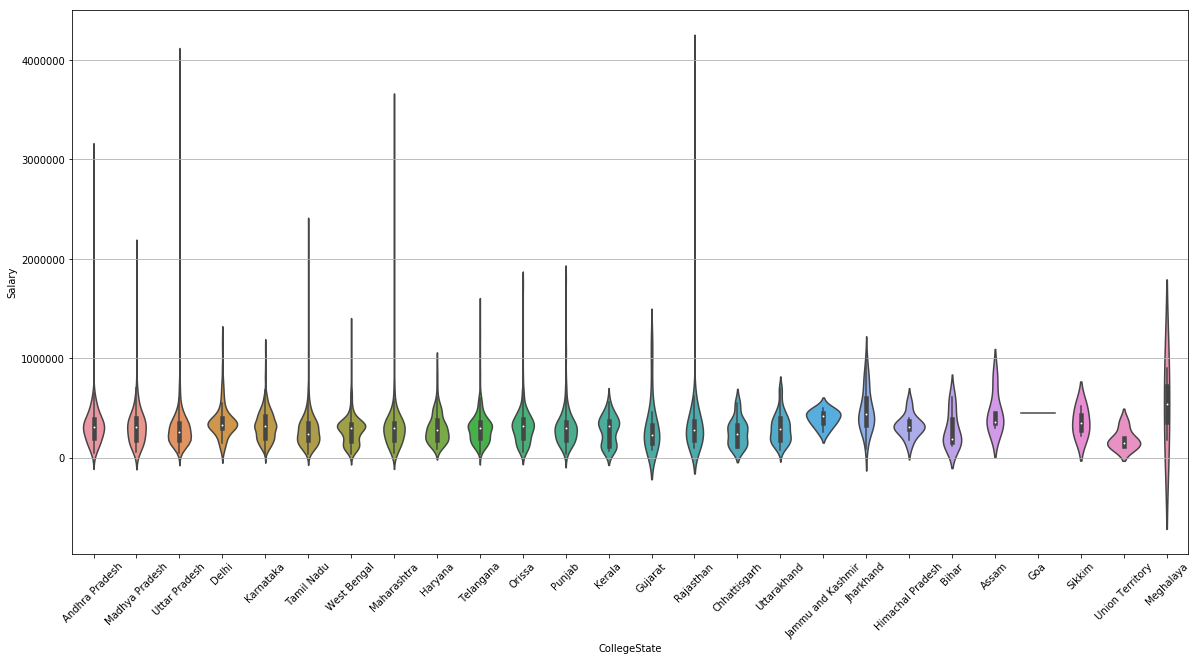

In [42]:
ax = plt.figure(figsize = (20, 10))
ax = plt.xticks(rotation = 45)
ax = plt.grid(axis = 'y')
sns.violinplot(x = 'CollegeState', y = 'Salary', data = data)

##### Does gender affect salaries of graduates? 

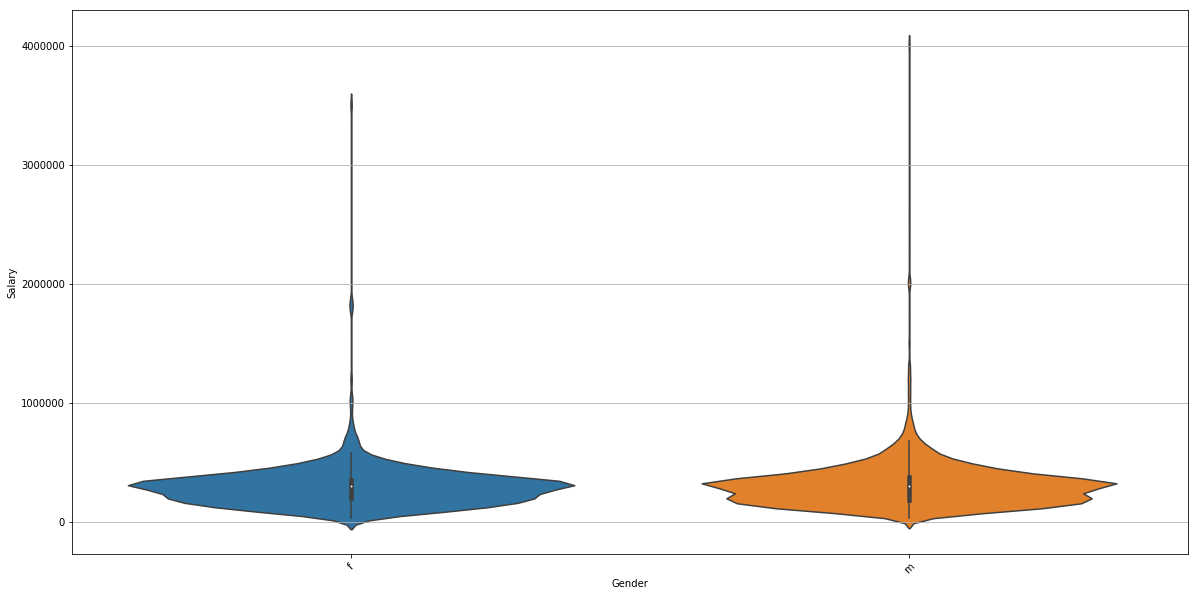

In [43]:
ax = plt.figure(figsize = (20, 10))
ax = plt.xticks(rotation = 45)
ax = plt.grid(axis = 'y')
sns.violinplot(x = 'Gender', y = 'Salary', data = data)

##### Does year of graduation affect salaries of graduates? 

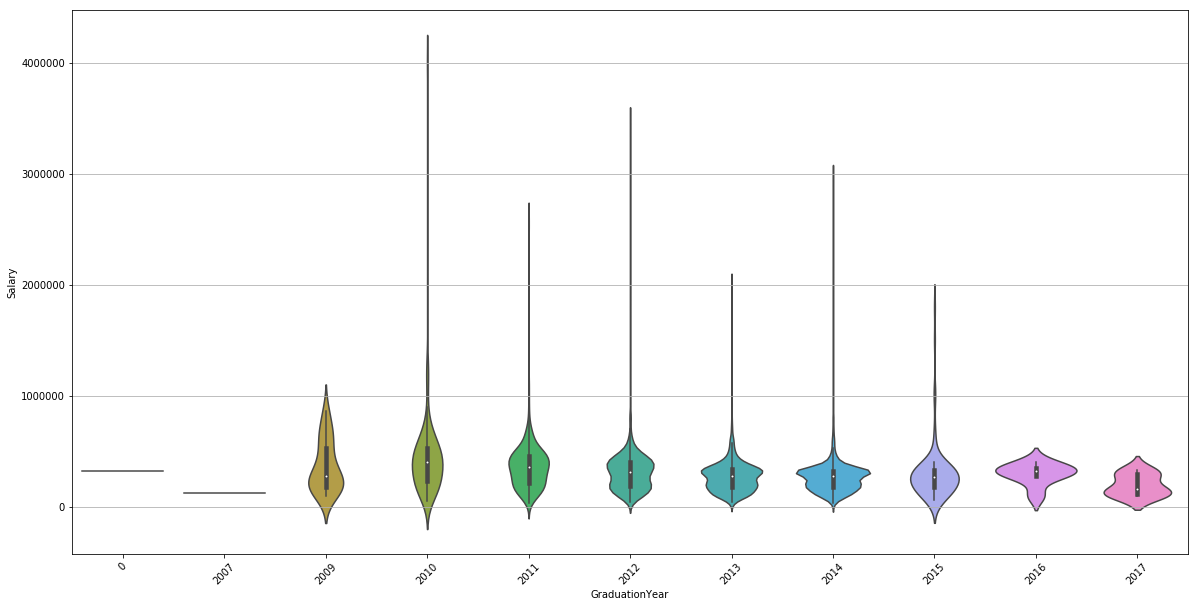

In [44]:
ax = plt.figure(figsize = (20, 10))
ax = plt.xticks(rotation = 45)
ax = plt.grid(axis = 'y')
sns.violinplot(x = 'GraduationYear', y = 'Salary', data = data)

##### Does degree awarded affect salaries of graduates? 

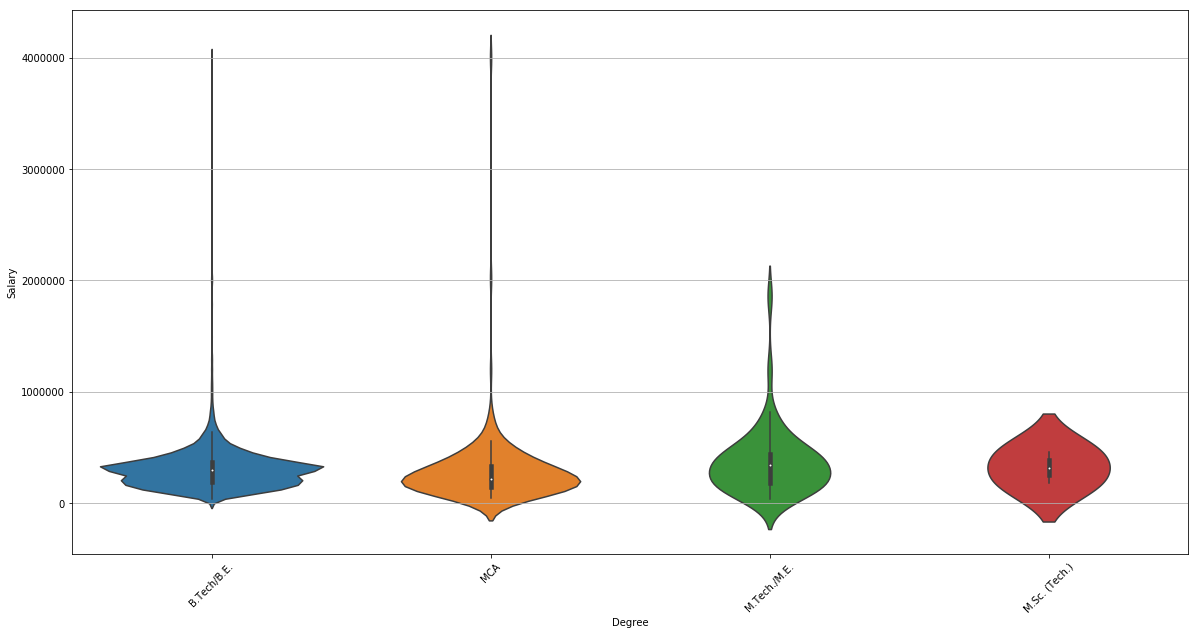

In [45]:
ax = plt.figure(figsize = (20, 10))
ax = plt.xticks(rotation = 45)
ax = plt.grid(axis = 'y')
sns.violinplot(x = 'Degree', y = 'Salary', data = data)

##### Encoding Categorical Features 

In [46]:
for i in cat_features:
    unique = len(data[i].unique())
    print("{}: {}".format(i, unique))

Specialization: 6
CollegeState: 26
GraduationYear: 11
Gender: 2
Degree: 4
CollegeTier: 2


In [47]:
for feature in cat_features:
    data = pd.get_dummies(data, prefix = feature, columns = [feature])

In [48]:
data.head()

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Specialization_CE,Specialization_CS,Specialization_EC,Specialization_EL,Specialization_ME,Specialization_other,CollegeState_Andhra Pradesh,CollegeState_Assam,CollegeState_Bihar,CollegeState_Chhattisgarh,CollegeState_Delhi,CollegeState_Goa,CollegeState_Gujarat,CollegeState_Haryana,CollegeState_Himachal Pradesh,CollegeState_Jammu and Kashmir,CollegeState_Jharkhand,CollegeState_Karnataka,CollegeState_Kerala,CollegeState_Madhya Pradesh,CollegeState_Maharashtra,CollegeState_Meghalaya,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal,GraduationYear_0,GraduationYear_2007,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017,Gender_f,Gender_m,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,CollegeTier_1,CollegeTier_2
0,420000,84.3,95.8,78.00,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
1,500000,85.4,85.0,70.06,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1
2,325000,85.0,68.2,70.00,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
3,1100000,85.6,83.6,74.64,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0
4,200000,78.0,76.8,73.90,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1


##### Making the target data categorical 

In [49]:
y_cat = pd.qcut(data['Salary'], [0, .25, .5, .75, 1])

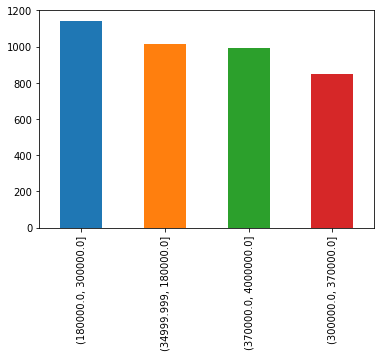

In [50]:
y_cat.value_counts().plot(kind = 'bar')

### Saving the pre-processed data

In [51]:
X = data.drop('Salary', axis = 1)
y_reg = data['Salary']

In [52]:
X.to_csv('../datasets/ameo_dataset/processed_dataset/X.csv', index = False)
y_reg.to_csv('../datasets/ameo_dataset/processed_dataset/y_reg.csv', header = True, index = False, index_label = 'Salary')
y_cat.to_csv('../datasets/ameo_dataset/processed_dataset/y_cat.csv', header = True, index = False, index_label = 'Salary')